# Exploratory Data Analysis: IMDb

In [1]:
# Importing a library for mathematical operations.

import numpy as np

# Importing a library for data manipulation.

import pandas as pd

# Importing libraries for data visualization.

import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
# Reading data into a Pandas DataFrame.

data = pd.read_json("Data.json")

In [3]:
# Printing first five rows of data.

data.head()

,color,director_name,num_critic_for_reviews,duration,gross,genres,star_name,movie_title,movie_imdb_link,language,country,budget,title_year,imdb_score
0,Color,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,602.0,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,813.0,164.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,250000000.0,2012.0,8.5
4,NaN,Doug Walker,NaN,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,7.1


## Data Cleaning

In [4]:
# Printing number of duplicate rows.

data.duplicated().sum()

122

In [5]:
# Dropping duplicate rows.

data.drop_duplicates(inplace=True)

In [6]:
# Printing number of missing values in each column.

data.isna().sum()

color                      19
director_name             102
num_critic_for_reviews     49
duration                   15
gross                     865
genres                      0
star_name                   7
movie_title                 0
movie_imdb_link             0
language                   12
country                     5
budget                    485
title_year                106
imdb_score                  0
dtype: int64

In [7]:
# Dropping rows with missing values.

data.dropna(inplace=True)

## Data Preprocessing

In [8]:
# Printing datatype of each column.

data.dtypes

color                      object
director_name              object
num_critic_for_reviews    float64
duration                  float64
gross                     float64
genres                     object
star_name                  object
movie_title                object
movie_imdb_link            object
language                   object
country                    object
budget                    float64
title_year                float64
imdb_score                float64
dtype: object

In [9]:
# Converting duration, gross, budget and title_year columns into int64 datatype.

data["duration"] = data["duration"].astype("int64")
data["gross"] = data["gross"].astype("int64")
data["budget"] = data["budget"].astype("int64")
data["title_year"] = data["title_year"].astype("int64")

In [10]:
# Dropping num_critic_for_reviews and movie_imdb_link columns.

data.drop(["num_critic_for_reviews", "movie_imdb_link"], axis=1, inplace=True)

In [11]:
# Printing first five rows of data.

data.head()

,color,director_name,duration,gross,genres,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,178,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,English,USA,237000000,2009,7.9
1,Color,Gore Verbinski,169,309404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000,2007,7.1
2,Color,Sam Mendes,148,200074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,English,UK,245000000,2015,6.8
3,Color,Christopher Nolan,164,448130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,English,USA,250000000,2012,8.5
5,Color,Andrew Stanton,132,73058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,English,USA,263700000,2012,6.6


## Univariate Analysis

### Analysis 1:

Analyzing the distribution of durations.

In [12]:
# Printing mean, 25th percentile and 75th percentile of duration column.

print("Mean:", np.mean(data["duration"]))
print("25th Percentile:", np.percentile(data["duration"], 25))
print("75th Percentile:", np.percentile(data["duration"], 75))

Mean: 109.82566137566137
25th Percentile: 95.0
75th Percentile: 120.0


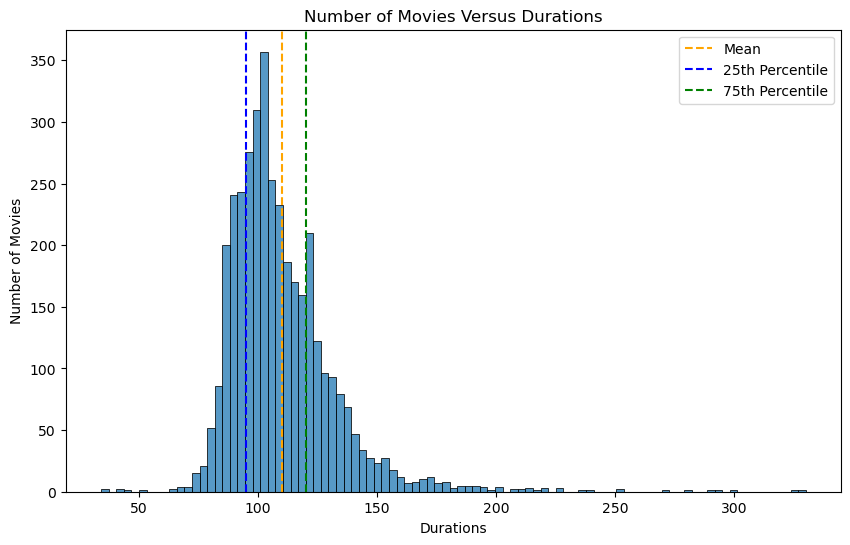

In [13]:
# Plotting a histogram for number of movies versus durations.

plt.figure(figsize=(10, 6))
sns.histplot(data["duration"])
plt.title("Number of Movies Versus Durations")
plt.xlabel("Durations")
plt.ylabel("Number of Movies")
plt.axvline(np.mean(data["duration"]), c="orange", ls="--", label="Mean")
plt.axvline(np.percentile(data["duration"], 25), c="blue", ls="--", label="25th Percentile")
plt.axvline(np.percentile(data["duration"], 75), c="green", ls="--", label="75th Percentile")
plt.legend()
plt.show()

### Conclusion 1:

Most movies have durations from 95 to 120 minutes with a mean of 109.82 minutes.

### Analysis 2:

Analyzing the distribution of IMDb scores.

In [14]:
# Printing mean, 25th percentile and 75th percentile of imdb_score column.

print("Mean:", np.mean(data["imdb_score"]))
print("25th Percentile:", np.percentile(data["imdb_score"], 25))
print("75th Percentile:", np.percentile(data["imdb_score"], 75))

Mean: 6.462089947089947
25th Percentile: 5.9
75th Percentile: 7.2


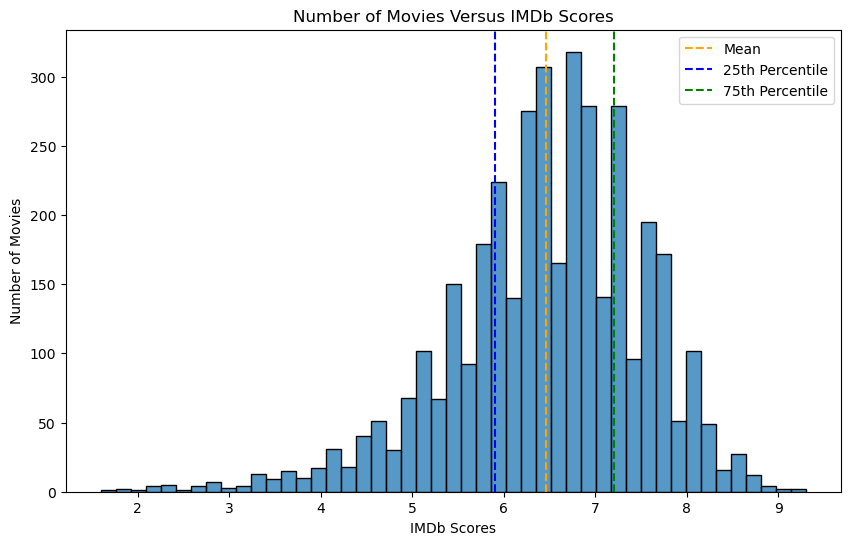

In [15]:
# Plotting a histogram for number of movies versus IMDb scores.

plt.figure(figsize=(10, 6))
sns.histplot(data["imdb_score"])
plt.title("Number of Movies Versus IMDb Scores")
plt.xlabel("IMDb Scores")
plt.ylabel("Number of Movies")
plt.axvline(np.mean(data["imdb_score"]), c="orange", ls="--", label="Mean")
plt.axvline(np.percentile(data["imdb_score"], 25), c="blue", ls="--", label="25th Percentile")
plt.axvline(np.percentile(data["imdb_score"], 75), c="green", ls="--", label="75th Percentile")
plt.legend()
plt.show()

### Conclusion 2:

Most movies have IMDb scores from 5.9 to 7.2 with a mean of 6.4.

### Analysis 3:

Analyzing the distribution of IMDb scores for movies in the UK.


In [16]:
# Printing mean, 25th percentile and 75th percentile of IMDb scores for movies in the UK.

print("Mean:", np.mean(data[data["country"] == "UK"]["imdb_score"]))
print("25th Percentile:", np.percentile(data[data["country"] == "UK"]["imdb_score"], 25))
print("75th Percentile:", np.percentile(data[data["country"] == "UK"]["imdb_score"], 75))

Mean: 6.837699680511183
25th Percentile: 6.4
75th Percentile: 7.4


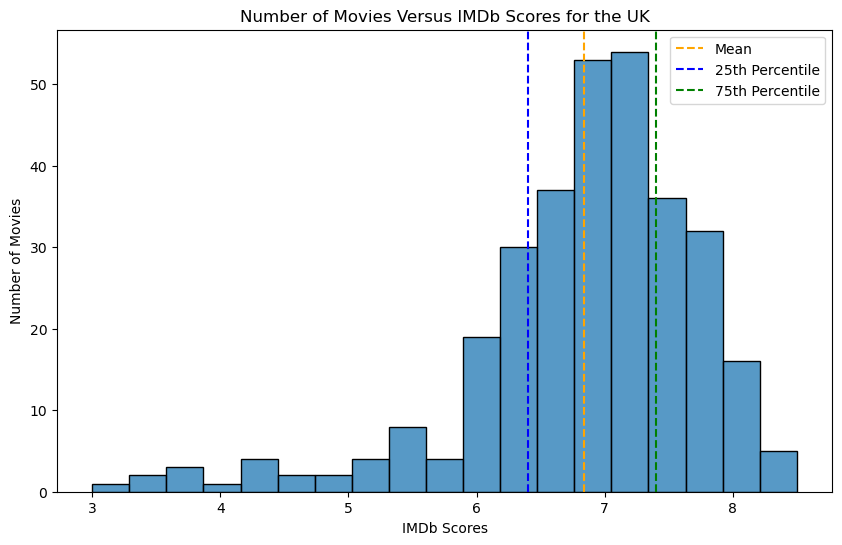

In [17]:
# Plotting a histogram for number of movies versus IMDb scores for the UK.

plt.figure(figsize=(10, 6))
sns.histplot(data[data["country"] == "UK"]["imdb_score"])
plt.title("Number of Movies Versus IMDb Scores for the UK")
plt.xlabel("IMDb Scores")
plt.ylabel("Number of Movies")
plt.axvline(np.mean(data[data["country"] == "UK"]["imdb_score"]), c="orange", ls="--", label="Mean")
plt.axvline(np.percentile(data[data["country"] == "UK"]["imdb_score"], 25), c="blue", ls="--", label="25th Percentile")
plt.axvline(np.percentile(data[data["country"] == "UK"]["imdb_score"], 75), c="green", ls="--", label="75th Percentile")
plt.legend()
plt.show()

### Conclusion 3:

Most movies in the UK have IMDb scores from 6.4 to 7.4 with a mean of 6.8.

### Analysis 4:

Analyzing the distribution of IMDb scores for movies in the USA.

In [18]:
# Printing mean, 25th percentile and 75th percentile of IMDb scores for movies in the USA.

print("Mean:", np.mean(data[data["country"] == "USA"]["imdb_score"]))
print("25th Percentile:", np.percentile(data[data["country"] == "USA"]["imdb_score"], 25))
print("75th Percentile:", np.percentile(data[data["country"] == "USA"]["imdb_score"], 75))

Mean: 6.387010378305993
25th Percentile: 5.8
75th Percentile: 7.1


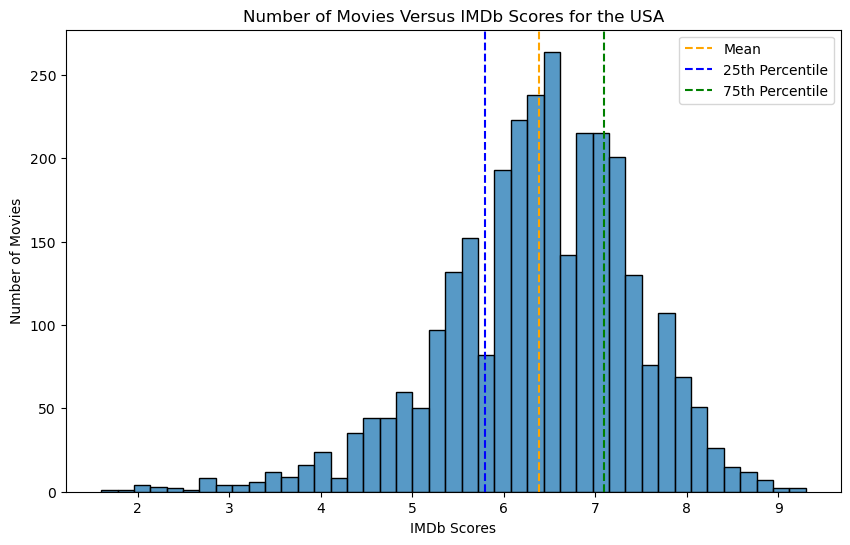

In [19]:
# Plotting a histogram for number of movies versus IMDb scores for the USA.

plt.figure(figsize=(10, 6))
sns.histplot(data[data["country"] == "USA"]["imdb_score"])
plt.title("Number of Movies Versus IMDb Scores for the USA")
plt.xlabel("IMDb Scores")
plt.ylabel("Number of Movies")
plt.axvline(np.mean(data[data["country"] == "USA"]["imdb_score"]), c="orange", ls="--", label="Mean")
plt.axvline(np.percentile(data[data["country"] == "USA"]["imdb_score"], 25), c="blue", ls="--", label="25th Percentile")
plt.axvline(np.percentile(data[data["country"] == "USA"]["imdb_score"], 75), c="green", ls="--", label="75th Percentile")
plt.legend()
plt.show()

### Conclusion 4:

Most movies in the USA have IMDb scores from 5.8 to 7.1 with a mean of 6.3.

## Bivariate Analysis

### Analysis 1:

Analyzing the distribution of IMDb scores for movies by James Cameron.

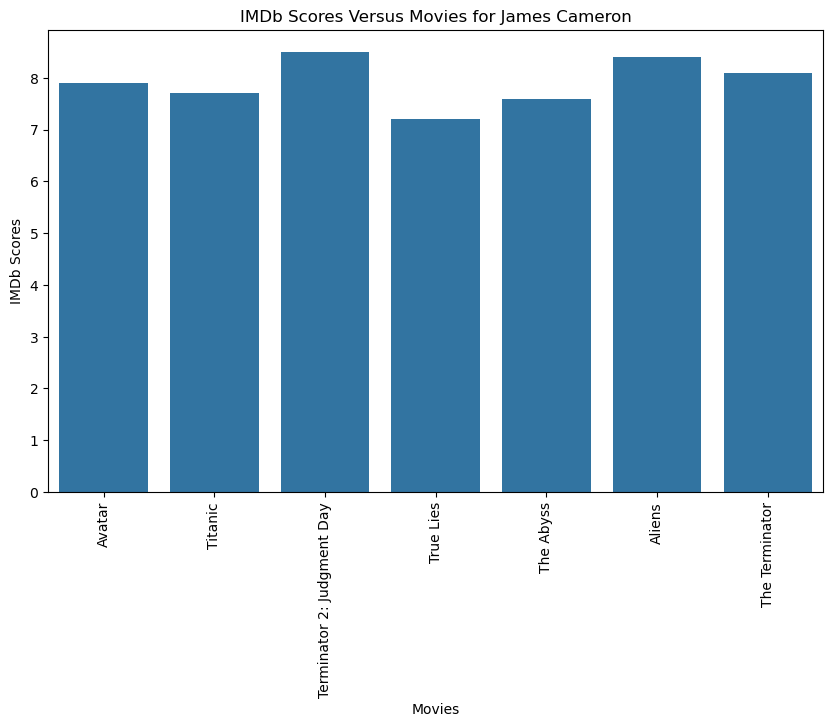

In [20]:
# Plotting a bar plot for IMDb scores versus movies for James Cameron.

plt.figure(figsize=(10, 6))
sns.barplot(x=data[data["director_name"] == "James Cameron"]["movie_title"], y=data[data["director_name"] == "James Cameron"]["imdb_score"])
plt.title("IMDb Scores Versus Movies for James Cameron")
plt.xlabel("Movies")
plt.ylabel("IMDb Scores")
plt.xticks(rotation="vertical")
plt.show()

### Conclusion 1:

IMDb scores for movies by James Cameron are uniformly distributed.

### Analysis 2:

Analyzing the distribution of IMDb scores for movies by Christopher Nolan.

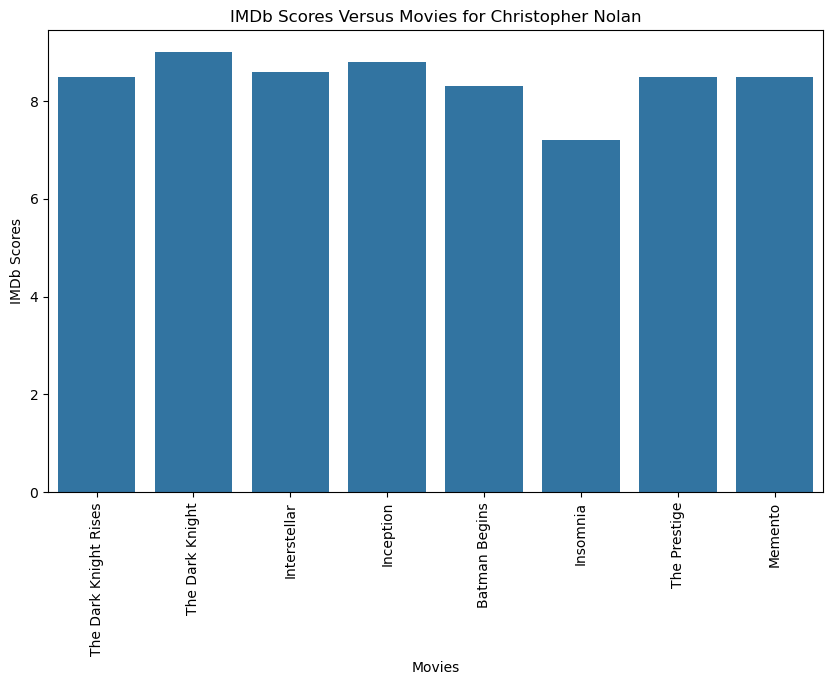

In [21]:
# Plotting a bar plot for IMDb scores versus movies for Christopher Nolan.

plt.figure(figsize=(10, 6))
sns.barplot(x=data[data["director_name"] == "Christopher Nolan"]["movie_title"], y=data[data["director_name"] == "Christopher Nolan"]["imdb_score"])
plt.title("IMDb Scores Versus Movies for Christopher Nolan")
plt.xlabel("Movies")
plt.ylabel("IMDb Scores")
plt.xticks(rotation="vertical")
plt.show()

### Conclusion 2:

IMDb scores for movies by Christopher Nolan are uniformly distributed.

### Analysis 3:

Analyzing the relationship between durations and IMDb scores.

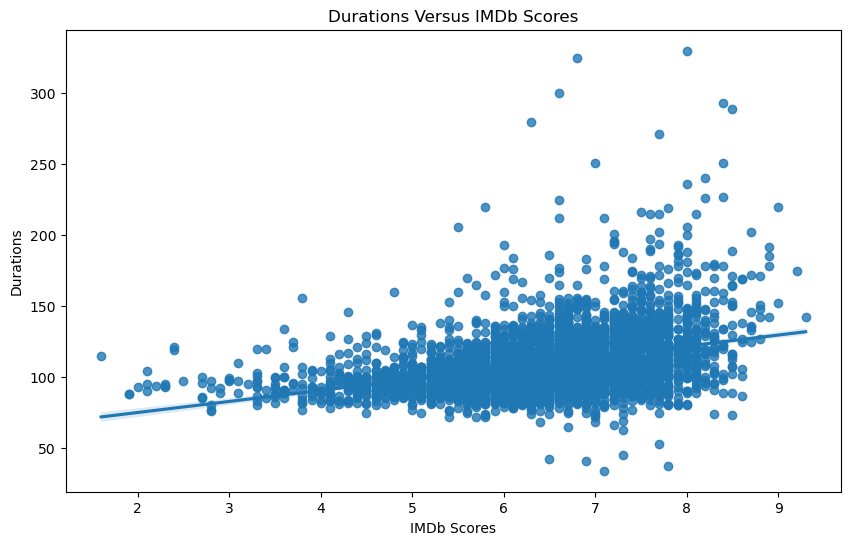

In [22]:
# Plotting a linear regression plot for durations versus IMDb scores.

plt.figure(figsize=(10, 6))
sns.regplot(x=data["imdb_score"], y=data["duration"])
plt.title("Durations Versus IMDb Scores")
plt.xlabel("IMDb Scores")
plt.ylabel("Durations")
plt.show()

### Conclusion 3:

Durations and IMDb scores are unrelated.

### Analysis 4:

Analyzing the relationship between gross and IMDb scores.

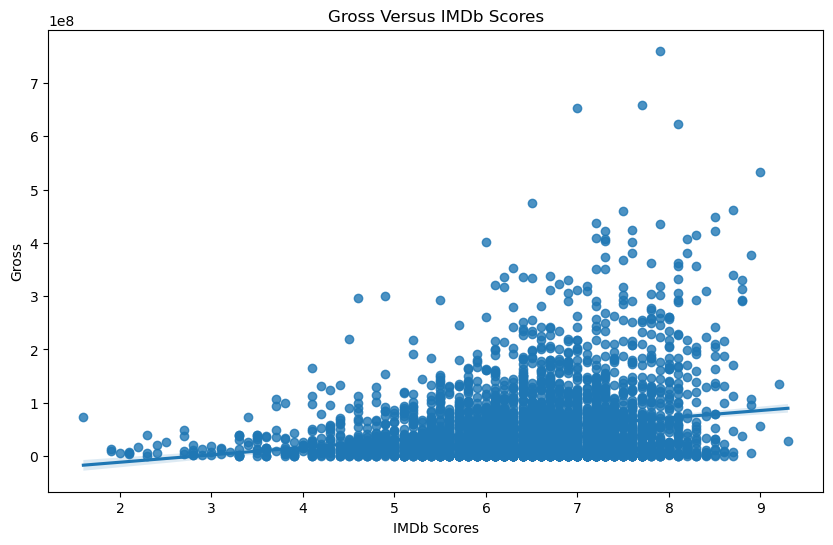

In [23]:
# Plotting a linear regression plot for gross versus IMDb scores.

plt.figure(figsize=(10, 6))
sns.regplot(x=data["imdb_score"], y=data["gross"])
plt.title("Gross Versus IMDb Scores")
plt.xlabel("IMDb Scores")
plt.ylabel("Gross")
plt.show()

### Conclusion 4:

Gross and IMDb scores are unrelated.

### Analysis 5:

Analyzing the distribution of mean IMDb scores for movies in various countries.

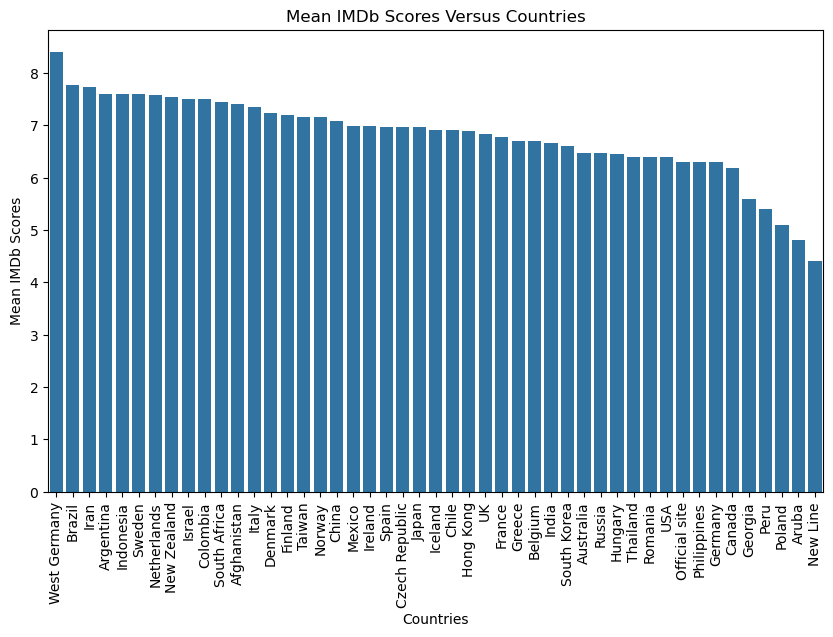

In [24]:
# Plotting a bar plot for mean IMDb scores versus countries.

plt.figure(figsize=(10, 6))
sns.barplot(data.groupby("country")["imdb_score"].mean().sort_values(ascending=False))
plt.title("Mean IMDb Scores Versus Countries")
plt.xlabel("Countries")
plt.ylabel("Mean IMDb Scores")
plt.xticks(rotation="vertical")
plt.show()

### Conclusion 5:

West Germany has the highest mean IMDb score for movies while New Line has the lowest mean IMDb score for movies.

## Correlation Analysis

In [25]:
# Assigning numerical columns into a Pandas DataFrame.

data_numerical = data.drop([column for column in data.columns if data[column].dtype == "object"], axis=1)

In [26]:
# Calculating pairwise correlation of columns.

data_numerical.corr()

,duration,gross,budget,title_year,imdb_score
duration,1.000000,0.245735,0.066191,-0.134660,0.362152
gross,0.245735,1.000000,0.096434,0.037356,0.213252
budget,0.066191,0.096434,1.000000,0.042186,0.029624
title_year,-0.134660,0.037356,0.042186,1.000000,-0.130798
imdb_score,0.362152,0.213252,0.029624,-0.130798,1.000000


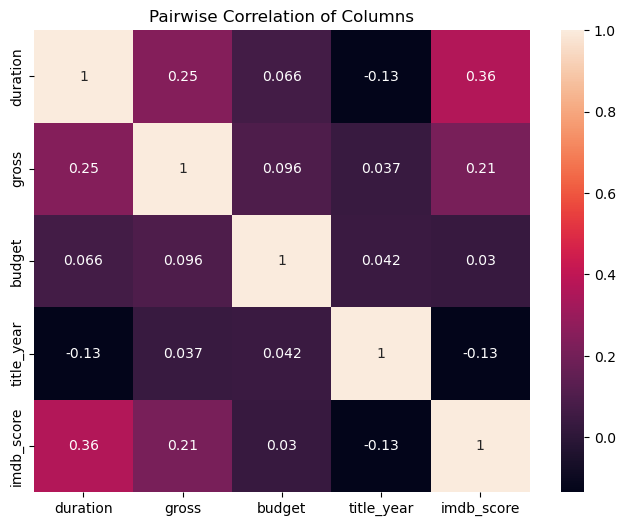

In [27]:
# Plotting a heatmap for pairwise correlation of columns.

plt.figure(figsize=(8, 6))
sns.heatmap(data_numerical.corr(), annot=True)
plt.title("Pairwise Correlation of Columns")
plt.show()